# Когортный анализ клиентов за 2016 - 2018 год

In [1]:
#Импорт библиотек
import pandas as pd
import numpy as np
import os
import copy

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Шаг 1. Считаем данные в датафрейм. Первичное знакомство с массивом информации.

In [2]:
%%time
#Укажем путь к исходнику
path_to_data = "C:/Users/Pavel/Documents/Demo/"
#Загружаем данные
df = pd.read_csv(os.path.join(path_to_data, "СohortAnalysis_2016_2018.csv"), sep=";", parse_dates=["date"], dayfirst=True)

Wall time: 5.04 s


In [3]:
#10 первых строк датафрейма
df.head(10)

,date,promo,site,user_id,transaction_id,amount
0,2017-04-09,акция 4,сайт 3,u1009,2,200
1,2017-02-02,акция 9,сайт 1,u10017,3,400
2,2016-03-15,акция 4,сайт 3,u10033,4,400
3,2017-03-26,акция 6,сайт 5,u1007,5,600
4,2016-04-23,акция 8,сайт 3,u10045,6,900
5,2016-04-12,акция 6,сайт 2,u10028,7,1000
6,2016-09-18,акция 7,сайт 4,u10064,8,700
7,2016-06-18,акция 7,сайт 3,u10017,9,400
8,2016-11-20,акция 9,сайт 1,u10021,10,400
9,2017-01-04,акция 5,сайт 3,u10030,11,100


In [4]:
#Базовая информация по датафрейму
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   date            1048575 non-null  datetime64[ns]
 1   promo           1048575 non-null  object        
 2   site            1048575 non-null  object        
 3   user_id         1048575 non-null  object        
 4   transaction_id  1048575 non-null  int64         
 5   amount          1048575 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 48.0+ MB


In [5]:
%%time
#Отфильтруем массив так, чтобы визуально контролировать правильность дальнейших действий
df.sort_values(by=["user_id","date"], inplace = True)

Wall time: 8.8 s


In [6]:
df.head(10)

,date,promo,site,user_id,transaction_id,amount
112,2016-03-02,акция 6,сайт 3,u10010,114,600
1557,2016-06-07,акция 1,сайт 3,u100100,1559,200
8199,2017-05-31,акция 2,сайт 5,u100100,8201,900
999220,2018-11-16,акция 2,сайт 5,u100100,999222,700
34012,2017-01-22,акция 3,сайт 5,u10010000,34014,600
141546,2016-05-21,акция 8,сайт 5,u1001000001,141548,400
337486,2017-06-26,акция 7,сайт 2,u1001000001,337488,200
397676,2017-09-14,акция 5,сайт 2,u1001000002,397678,200
1011650,2018-08-03,акция 7,сайт 3,u10010000028,1011652,800
369468,2017-06-23,акция 5,сайт 2,u1001000005,369470,500


#### Шаг 2. Рассчитаем вспомогательную таблицу с метриками по каждому уникальному user_id (количество транзакций по клиенту, дата первой покупки, год-месяц первой покупки). Добавим рассчитанные метрики в основную таблицу.

In [7]:
%%time
#Построим вспомогательную таблицу путем группировки по полю user_id. 
df_groupby_user = df.groupby(by = ["user_id"]).agg({"date": "min", "amount": ["sum","count"]})
df_groupby_user.reset_index(inplace = True)
#Переименуем столбцы
new_columns = ["user_id","first_date_transaction", "total_amount_user","count_transaction_user"]
df_groupby_user.columns = new_columns

Wall time: 16.9 s


In [8]:
df_groupby_user.head(10)

,user_id,first_date_transaction,total_amount_user,count_transaction_user
0,u10010,2016-03-02,600,1
1,u100100,2016-06-07,1800,3
2,u10010000,2017-01-22,600,1
3,u1001000001,2016-05-21,600,2
4,u1001000002,2017-09-14,200,1
5,u10010000028,2018-08-03,800,1
6,u1001000005,2017-06-23,500,1
7,u1001000016,2017-07-24,400,1
8,u1001000019,2017-05-28,500,1
9,u100100002,2016-06-01,900,2


In [9]:
%%time
#Добавим столбец ГОД-МЕСЯЦ
df_groupby_user["first_transaction"] = df_groupby_user["first_date_transaction"].dt.strftime('%Y-%m')

Wall time: 22.8 s


In [10]:
df_groupby_user.head(10)

,user_id,first_date_transaction,total_amount_user,count_transaction_user,first_transaction
0,u10010,2016-03-02,600,1,2016-03
1,u100100,2016-06-07,1800,3,2016-06
2,u10010000,2017-01-22,600,1,2017-01
3,u1001000001,2016-05-21,600,2,2016-05
4,u1001000002,2017-09-14,200,1,2017-09
5,u10010000028,2018-08-03,800,1,2018-08
6,u1001000005,2017-06-23,500,1,2017-06
7,u1001000016,2017-07-24,400,1,2017-07
8,u1001000019,2017-05-28,500,1,2017-05
9,u100100002,2016-06-01,900,2,2016-06


In [11]:
%%time
#Объединим таблицы
df_final = pd.merge(df, df_groupby_user, how = "left", on = "user_id")

Wall time: 3.34 s


In [12]:
df_final.head(10)

,date,promo,site,user_id,transaction_id,amount,first_date_transaction,total_amount_user,count_transaction_user,first_transaction
0,2016-03-02,акция 6,сайт 3,u10010,114,600,2016-03-02,600,1,2016-03
1,2016-06-07,акция 1,сайт 3,u100100,1559,200,2016-06-07,1800,3,2016-06
2,2017-05-31,акция 2,сайт 5,u100100,8201,900,2016-06-07,1800,3,2016-06
3,2018-11-16,акция 2,сайт 5,u100100,999222,700,2016-06-07,1800,3,2016-06
4,2017-01-22,акция 3,сайт 5,u10010000,34014,600,2017-01-22,600,1,2017-01
5,2016-05-21,акция 8,сайт 5,u1001000001,141548,400,2016-05-21,600,2,2016-05
6,2017-06-26,акция 7,сайт 2,u1001000001,337488,200,2016-05-21,600,2,2016-05
7,2017-09-14,акция 5,сайт 2,u1001000002,397678,200,2017-09-14,200,1,2017-09
8,2018-08-03,акция 7,сайт 3,u10010000028,1011652,800,2018-08-03,800,1,2018-08
9,2017-06-23,акция 5,сайт 2,u1001000005,369470,500,2017-06-23,500,1,2017-06


#### Шаг 3. Рассчитаем показатель "количество дней с первой транзакции" и проведем кластеризацию данного показателя

In [13]:
%%time
# Рассчитаем показатель "количество дней с первой транзации"
df_final["delta_days"] = df_final["date"] - df_final["first_date_transaction"]
df_final["delta_days"] = df_final["delta_days"].apply(lambda x: x.days)

Wall time: 32.5 s


In [14]:
df_final.head(10)

,date,promo,site,user_id,transaction_id,amount,first_date_transaction,total_amount_user,count_transaction_user,first_transaction,delta_days
0,2016-03-02,акция 6,сайт 3,u10010,114,600,2016-03-02,600,1,2016-03,0
1,2016-06-07,акция 1,сайт 3,u100100,1559,200,2016-06-07,1800,3,2016-06,0
2,2017-05-31,акция 2,сайт 5,u100100,8201,900,2016-06-07,1800,3,2016-06,358
3,2018-11-16,акция 2,сайт 5,u100100,999222,700,2016-06-07,1800,3,2016-06,892
4,2017-01-22,акция 3,сайт 5,u10010000,34014,600,2017-01-22,600,1,2017-01,0
5,2016-05-21,акция 8,сайт 5,u1001000001,141548,400,2016-05-21,600,2,2016-05,0
6,2017-06-26,акция 7,сайт 2,u1001000001,337488,200,2016-05-21,600,2,2016-05,401
7,2017-09-14,акция 5,сайт 2,u1001000002,397678,200,2017-09-14,200,1,2017-09,0
8,2018-08-03,акция 7,сайт 3,u10010000028,1011652,800,2018-08-03,800,1,2018-08,0
9,2017-06-23,акция 5,сайт 2,u1001000005,369470,500,2017-06-23,500,1,2017-06,0


In [15]:
%%time
# Выделяем когорты. 
cut_labels_days = [x for x in range (30, 1230, 30)]
cut_bins_days = [x for x in range (0, 1230, 30)]
df_final["cohort_days"] = pd.cut(df_final["delta_days"], bins = cut_bins_days, labels=cut_labels_days, right = True)

Wall time: 114 ms


In [16]:
%%time
#Заменяем нулевые значения в категориальных данных. Просто применить fillna здесь не получиться!
df_final["cohort_days"] = df_final["cohort_days"].cat.add_categories([0])
df_final["cohort_days"].fillna(0, inplace = True)
#Уходим от категориального типа данных. Если оставить данный тип, то "0" в сводной таблице будет отображаться в самом конце, а по условию задачи 
# он должен выводиться первым.
df_final["cohort_days"] = df_final["cohort_days"].astype(int)

Wall time: 70 ms


In [17]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   date                    1048575 non-null  datetime64[ns]
 1   promo                   1048575 non-null  object        
 2   site                    1048575 non-null  object        
 3   user_id                 1048575 non-null  object        
 4   transaction_id          1048575 non-null  int64         
 5   amount                  1048575 non-null  int64         
 6   first_date_transaction  1048575 non-null  datetime64[ns]
 7   total_amount_user       1048575 non-null  int64         
 8   count_transaction_user  1048575 non-null  int64         
 9   first_transaction       1048575 non-null  object        
 10  delta_days              1048575 non-null  int64         
 11  cohort_days             1048575 non-null  int32         
dtypes: datetime64[

In [18]:
df_final.head(10)

,date,promo,site,user_id,transaction_id,amount,first_date_transaction,total_amount_user,count_transaction_user,first_transaction,delta_days,cohort_days
0,2016-03-02,акция 6,сайт 3,u10010,114,600,2016-03-02,600,1,2016-03,0,0
1,2016-06-07,акция 1,сайт 3,u100100,1559,200,2016-06-07,1800,3,2016-06,0,0
2,2017-05-31,акция 2,сайт 5,u100100,8201,900,2016-06-07,1800,3,2016-06,358,360
3,2018-11-16,акция 2,сайт 5,u100100,999222,700,2016-06-07,1800,3,2016-06,892,900
4,2017-01-22,акция 3,сайт 5,u10010000,34014,600,2017-01-22,600,1,2017-01,0,0
5,2016-05-21,акция 8,сайт 5,u1001000001,141548,400,2016-05-21,600,2,2016-05,0,0
6,2017-06-26,акция 7,сайт 2,u1001000001,337488,200,2016-05-21,600,2,2016-05,401,420
7,2017-09-14,акция 5,сайт 2,u1001000002,397678,200,2017-09-14,200,1,2017-09,0,0
8,2018-08-03,акция 7,сайт 3,u10010000028,1011652,800,2018-08-03,800,1,2018-08,0,0
9,2017-06-23,акция 5,сайт 2,u1001000005,369470,500,2017-06-23,500,1,2017-06,0,0


In [19]:
%%time
#Построим сводную таблицу
df_pivot_table = pd.pivot_table(df_final, values=["amount"], index=["first_transaction"], columns=["cohort_days"], aggfunc=np.sum, fill_value = 0)

Wall time: 597 ms


In [20]:
#Просмотр полученного результата
df_pivot_table

amount                                             \
cohort_days            0        30       60       90      120     150    
first_transaction                                                        
2016-01             6348600    73500    65100    69000   77000   73800   
2016-02             6007300    75100    68500    67700   62900   66000   
2016-03             6266900    71500    59300    68000   81800   65300   
2016-04             6081500    65700    65200    77500   62600   71100   
2016-05             6097900    62500    60400    65900   58700   65600   
2016-06             5871300    75100    71700    69000   69300   68700   
2016-07             5961300    68700    61100    69400   75000   71300   
2016-08             5856500    52500    58400    72700   67000   64100   
2016-09             5661700    62000    64700    54500   59500   57700   
2016-10             5825300    64900    67100    51100   58500   58800   
2016-11             5444300    54900    69400    63200   52700   64500   
2016-12             5699400    58000    51800    54500   57300   62100   
2017-01             5599200    57400    56800    62100   68300   77700   
2017-02             4968500    53200    54700    49100   56900  139900   
2017-03             5467000    54200    51000    78500  160500  170000   
2017-04             5238600    48300    86300   150600  187400  179700   
2017-05             5388300    80200   168900   170600  165100   70300   
2017-06            37348100   990900  1013400  1018100  277500  136700   
2017-07            62592700  1705300  1551700   670300  219200  228900   
2017-08            60332400  1514300   596200   217200  233300  215100   
2017-09            46717000   487600   171900   168500  171900  165200   
2017-10            15254800    53600    49200    43000   50800   40600   
2017-11            14617300    45300    56600    56600   48100   51800   
2017-12            15313200    66500    47700    34300   48100   49900   
2018-01            15093200    44200    53200    42100   61200   53400   
2018-02            13678700    50100    48200    45000   37500   42500   
2018-03            15009000    51500    45300    56300   39300   41800   
2018-04            14452600    54300    57700    39600   55100   47500   
2018-05            14917900    56200    44000    41900   43200   49500   
2018-06            14340900    50700    46900    45200   54400   52700   
2018-07            14900800    54400    53000    40700   45400   46300   
2018-08            14658700    50600    41800    39400   52400   28500   
2018-09            14047600    48200    40900    40500   27200       0   
2018-10            14798000    42000    49900    25200       0       0   
2018-11            14156400    45200    25700        0       0       0   
2018-12            14442700    22100        0        0       0       0   

                                                   ...                       \
cohort_days          180     210     240     270   ...   840    870    900    
first_transaction                                  ...                        
2016-01             75100   70700   77800   79600  ...  23100  26700  19300   
2016-02             61900   65600   65500   70900  ...  23800  18600  21000   
2016-03             67400   69900   64600   70700  ...  18700  19300  17200   
2016-04             63400   63000   65500   76500  ...  24100  17000  22500   
2016-05             58200   63200   72900   73900  ...  24100  26700  19500   
2016-06             72500   60600   54200   63400  ...  23500  16600  20400   
2016-07             59100   66400   68500   60500  ...  30400  29900  19000   
2016-08             75300   65600   65200   62900  ...  17700  17400   2800   
2016-09             55100   54300   64900   81300  ...  19600   1700      0   
2016-10             48100   75800   68800  193200  ...    400      0      0   
2016-11             71700   65700  151800  166300  ...      0      0      0   
2016-12             72600  1

#### Шаг 4. Посчитаем накопительный итог и отобразим данные на  графике

In [21]:
%%time
#Подсчитываем накопительный итог по столбцу amount
df_pivot_table_cumsum = df_final.groupby(by = ["first_transaction","cohort_days"]).agg({"amount": ["sum"]}).groupby(level=0).cumsum().reset_index()
df_pivot_table_cumsum.columns = ["first_transaction","cohort_days","cumsum_amount"]

Wall time: 610 ms


In [22]:
%%time
#Создадим копию таблицы для построения графика
df_pivot_table_cumsum_chart = copy.deepcopy(df_pivot_table_cumsum)
#Приведем числовые данные к миллионам рублей, чтобы упростить читаемость значений на оси Y.
df_pivot_table_cumsum_chart["cumsum_amount"]=round(df_pivot_table_cumsum_chart["cumsum_amount"]/1000000, 2)

Wall time: 45 ms


In [23]:
df_pivot_table_cumsum_chart.head(10)

,first_transaction,cohort_days,cumsum_amount
0,2016-01,0,6.35
1,2016-01,30,6.42
2,2016-01,60,6.49
3,2016-01,90,6.56
4,2016-01,120,6.63
5,2016-01,150,6.71
6,2016-01,180,6.78
7,2016-01,210,6.85
8,2016-01,240,6.93
9,2016-01,270,7.01


Wall time: 465 ms


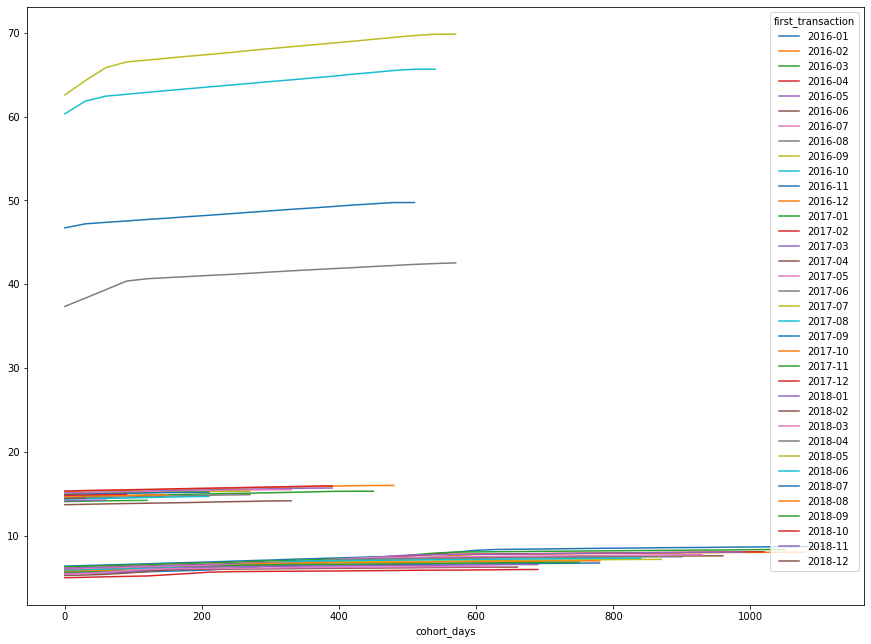

In [24]:
%%time
df_pivot_table_cumsum_chart.pivot(index="cohort_days", columns="first_transaction", values="cumsum_amount").plot(figsize = (15,11))

#### Шаг 5. Рассчитаем процентное отношение суммы первых покупок клиентов к нарастающему итогу по ряду

In [25]:
%%time
#Создадим вспомогательную таблицу с суммами первых покупок 
df_pivot_table_cumsum_first = copy.deepcopy(df_pivot_table_cumsum[df_pivot_table_cumsum["cohort_days"]==0])
df_pivot_table_cumsum_first.rename(columns={"cumsum_amount": "cumsum_amount_first"}, inplace=True)

Wall time: 6 ms


In [26]:
df_pivot_table_cumsum_first.head(10)

,first_transaction,cohort_days,cumsum_amount_first
0,2016-01,0,6348600
38,2016-02,0,6007300
75,2016-03,0,6266900
111,2016-04,0,6081500
146,2016-05,0,6097900
180,2016-06,0,5871300
213,2016-07,0,5961300
245,2016-08,0,5856500
276,2016-09,0,5661700
306,2016-10,0,5825300


In [27]:
%%time
#Объединим таблицы
df_pivot_table_cumsum_percent = pd.merge(df_pivot_table_cumsum, df_pivot_table_cumsum_first, how = "left", on = "first_transaction")

Wall time: 14 ms


In [28]:
df_pivot_table_cumsum_percent.head(10)

,first_transaction,cohort_days_x,cumsum_amount,cohort_days_y,cumsum_amount_first
0,2016-01,0,6348600,0,6348600
1,2016-01,30,6422100,0,6348600
2,2016-01,60,6487200,0,6348600
3,2016-01,90,6556200,0,6348600
4,2016-01,120,6633200,0,6348600
5,2016-01,150,6707000,0,6348600
6,2016-01,180,6782100,0,6348600
7,2016-01,210,6852800,0,6348600
8,2016-01,240,6930600,0,6348600
9,2016-01,270,7010200,0,6348600


In [29]:
%%time
#Расчитаем процентное отношение
df_pivot_table_cumsum_percent["%_amount"] = (df_pivot_table_cumsum_percent["cumsum_amount"]/df_pivot_table_cumsum_percent["cumsum_amount_first"]-1)*100
df_pivot_table_cumsum_percent["%_amount"] = round(df_pivot_table_cumsum_percent["%_amount"],1).apply(lambda x:"{}%".format(x))
#Удалим ненужные для будущих расчетов столбцы из датафрейма
df_pivot_table_cumsum_percent.drop(["cumsum_amount", "cumsum_amount_first","cohort_days_y"], axis='columns', inplace=True)
#Переименуем столбцы
df_pivot_table_cumsum_percent.rename(columns={"cohort_days_x": "cohort_days"}, inplace=True)

Wall time: 25 ms


In [30]:
df_pivot_table_cumsum_percent.head(10)

,first_transaction,cohort_days,%_amount
0,2016-01,0,0.0%
1,2016-01,30,1.2%
2,2016-01,60,2.2%
3,2016-01,90,3.3%
4,2016-01,120,4.5%
5,2016-01,150,5.6%
6,2016-01,180,6.8%
7,2016-01,210,7.9%
8,2016-01,240,9.2%
9,2016-01,270,10.4%


In [31]:
%%time
df_pivot_table_cumsum_percent.pivot(index="first_transaction", columns="cohort_days", values="%_amount").fillna(0)

Wall time: 33 ms


cohort_days,0,30,60,90,120,150,180,210,240,270,...,840,870,900,930,960,990,1020,1050,1080,1110
first_transaction,,,,,,,,,,,,,,,,,,,,,
2016-01,0.0%,1.2%,2.2%,3.3%,4.5%,5.6%,6.8%,7.9%,9.2%,10.4%,...,34.2%,34.6%,34.9%,35.2%,35.6%,35.9%,36.2%,36.6%,36.9%,36.9%
2016-02,0.0%,1.3%,2.4%,3.5%,4.6%,5.7%,6.7%,7.8%,8.9%,10.1%,...,31.4%,31.7%,32.0%,32.3%,32.7%,32.9%,33.2%,33.5%,33.6%,0
2016-03,0.0%,1.1%,2.1%,3.2%,4.5%,5.5%,6.6%,7.7%,8.7%,9.9%,...,31.0%,31.3%,31.6%,31.9%,32.2%,32.6%,33.0%,33.0%,0,0
2016-04,0.0%,1.1%,2.2%,3.4%,4.5%,5.6%,6.7%,7.7%,8.8%,10.0%,...,30.7%,31.0%,31.4%,31.8%,32.1%,32.5%,32.5%,0,0,0
2016-05,0.0%,1.0%,2.0%,3.1%,4.1%,5.1%,6.1%,7.1%,8.3%,9.5%,...,30.2%,30.7%,31.0%,31.3%,31.5%,31.6%,0,0,0,0
2016-06,0.0%,1.3%,2.5%,3.7%,4.9%,6.0%,7.3%,8.3%,9.2%,10.3%,...,28.2%,28.5%,28.8%,29.1%,29.2%,0,0,0,0,0
2016-07,0.0%,1.2%,2.2%,3.3%,4.6%,5.8%,6.8%,7.9%,9.1%,10.1%,...,28.5%,29.0%,29.3%,29.4%,0,0,0,0,0,0
2016-08,0.0%,0.9%,1.9%,3.1%,4.3%,5.4%,6.7%,7.8%,8.9%,10.0%,...,27.3%,27.6%,27.6%,0,0,0,0,0,0,0
2016-09,0.0%,1.1%,2.2%,3.2%,4.3%,5.3%,6.2%,7.2%,8.3%,9.8%,...,26.4%,26.4%,0,0,0,0,0,0,0,0


#### Шаг 6. Рассчитаем метрики промо

In [32]:
df_final.head(10)

,date,promo,site,user_id,transaction_id,amount,first_date_transaction,total_amount_user,count_transaction_user,first_transaction,delta_days,cohort_days
0,2016-03-02,акция 6,сайт 3,u10010,114,600,2016-03-02,600,1,2016-03,0,0
1,2016-06-07,акция 1,сайт 3,u100100,1559,200,2016-06-07,1800,3,2016-06,0,0
2,2017-05-31,акция 2,сайт 5,u100100,8201,900,2016-06-07,1800,3,2016-06,358,360
3,2018-11-16,акция 2,сайт 5,u100100,999222,700,2016-06-07,1800,3,2016-06,892,900
4,2017-01-22,акция 3,сайт 5,u10010000,34014,600,2017-01-22,600,1,2017-01,0,0
5,2016-05-21,акция 8,сайт 5,u1001000001,141548,400,2016-05-21,600,2,2016-05,0,0
6,2017-06-26,акция 7,сайт 2,u1001000001,337488,200,2016-05-21,600,2,2016-05,401,420
7,2017-09-14,акция 5,сайт 2,u1001000002,397678,200,2017-09-14,200,1,2017-09,0,0
8,2018-08-03,акция 7,сайт 3,u10010000028,1011652,800,2018-08-03,800,1,2018-08,0,0
9,2017-06-23,акция 5,сайт 2,u1001000005,369470,500,2017-06-23,500,1,2017-06,0,0


In [33]:
%%time
#Проведем группировку датафрейма df_final по полю promo. Рассчитываем суммарную выручку по акциям, а также количество уникальных пользователей в какой акции
df_final_group_promo = df_final.groupby(by=["promo"]).agg({"amount":"sum","user_id":"nunique"}).reset_index()
df_final_group_promo.columns = ["promo", "total_amount", "count_unique_user"]

Wall time: 2.18 s


In [34]:
df_final_group_promo.head(10)

,promo,total_amount,count_unique_user
0,акция 1,64088000,115234
1,акция 2,64132500,115218
2,акция 3,64385800,115656
3,акция 4,64066700,115227
4,акция 5,64078000,115208
5,акция 6,63895500,115311
6,акция 7,64194900,115242
7,акция 8,64086800,115212
8,акция 9,63943800,114691


In [35]:
%%time
#Рассчитаем выручку, приходящуюся на одного уникального пользователя
df_final_group_promo["amount_unique_user"] = round(df_final_group_promo["total_amount"]/df_final_group_promo["count_unique_user"],0)

Wall time: 3 ms


In [36]:
df_final_group_promo.head(10)

,promo,total_amount,count_unique_user,amount_unique_user
0,акция 1,64088000,115234,556.0
1,акция 2,64132500,115218,557.0
2,акция 3,64385800,115656,557.0
3,акция 4,64066700,115227,556.0
4,акция 5,64078000,115208,556.0
5,акция 6,63895500,115311,554.0
6,акция 7,64194900,115242,557.0
7,акция 8,64086800,115212,556.0
8,акция 9,63943800,114691,558.0


In [37]:
#Функция, позволяющая получать суммарную выручку по акции за первые 90 дней. При этом не учитывается сумма первоначальной покупки (там где cohort_days == 0)
def amount_90_days(val):
    return df_final[(df_final["promo"] ==val)&(df_final["cohort_days"].isin([30,60,90]))]["amount"].sum()

In [38]:
%%time
#Применим функцию к датафрейму
df_final_group_promo["amount_90_days"] = df_final_group_promo["promo"].apply(lambda x: amount_90_days(x))
df_final_group_promo

Wall time: 2.95 s


,promo,total_amount,count_unique_user,amount_unique_user,amount_90_days
0,акция 1,64088000,115234,556.0,1703700
1,акция 2,64132500,115218,557.0,1784500
2,акция 3,64385800,115656,557.0,1749000
3,акция 4,64066700,115227,556.0,1691200
4,акция 5,64078000,115208,556.0,1725900
5,акция 6,63895500,115311,554.0,1709900
6,акция 7,64194900,115242,557.0,1764100
7,акция 8,64086800,115212,556.0,1775300
8,акция 9,63943800,114691,558.0,1698100


#### Шаг 7. Визуализируем полученные результаты

Wall time: 113 ms


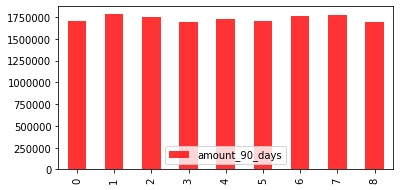

In [39]:
%%time
#Построим график по суммарной выручке за 90 дней
df_final_group_promo.loc[:,["promo","amount_90_days"]].plot.bar(color='r', alpha=0.8,figsize=(6, 3))